##### Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters
##### using the elbow method.
##### Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import pandas as pd,numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
x = data.drop('Species',axis=1)
y = data['Species']

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

C:\Users\91862\anaconda3\envs\env_name\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91862\anaconda3\envs\env_name\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91862\anaconda3\envs\env_name\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91862\anaconda3\envs\env_name\lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

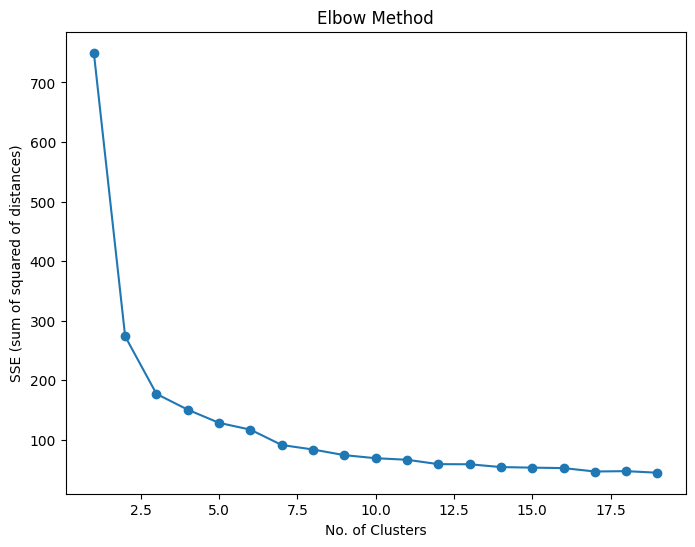

In [6]:
sse = []
for k in range (1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,20),sse,marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE (sum of squared of distances)')
plt.show();

In [7]:
# k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)

C:\Users\91862\anaconda3\envs\env_name\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

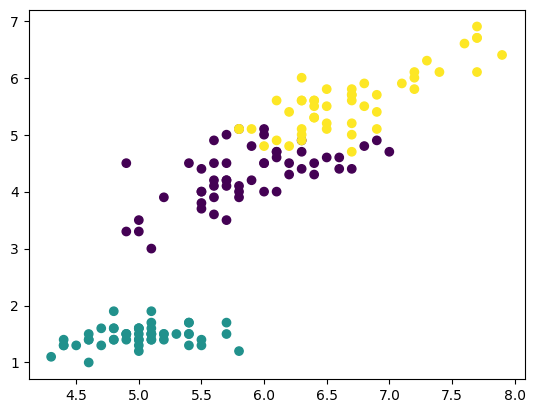

In [9]:
plt.scatter(data['SepalLengthCm'],data['PetalLengthCm'],c=kmeans.labels_)